In [59]:
#Housing data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [61]:
Housing = pd.read_csv('tes_data_project1.csv')

In [63]:
Housing.head()

,Id,LotArea,Street,Utilities,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,YrSold,SaleType,SaleCondition
0,1461,11622,Pave,AllPub,NAmes,Feedr,Norm,1Fam,5,6,...,0.0,1,0,2,1,5,Typ,2010,WD,Normal
1,1462,14267,Pave,AllPub,NAmes,Norm,Norm,1Fam,6,6,...,0.0,1,1,3,1,6,Typ,2010,WD,Normal
2,1463,13830,Pave,AllPub,Gilbert,Norm,Norm,1Fam,5,5,...,0.0,2,1,3,1,6,Typ,2010,WD,Normal
3,1464,9978,Pave,AllPub,Gilbert,Norm,Norm,1Fam,6,6,...,0.0,2,1,3,1,7,Typ,2010,WD,Normal
4,1465,5005,Pave,AllPub,StoneBr,Norm,Norm,TwnhsE,8,5,...,0.0,2,0,2,1,5,Typ,2010,WD,Normal


In [65]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   Street         1459 non-null   object 
 3   Utilities      1457 non-null   object 
 4   Neighborhood   1459 non-null   object 
 5   Condition1     1459 non-null   object 
 6   Condition2     1459 non-null   object 
 7   BldgType       1459 non-null   object 
 8   OverallQual    1459 non-null   int64  
 9   OverallCond    1459 non-null   int64  
 10  YearBuilt      1459 non-null   int64  
 11  YearRemodAdd   1459 non-null   int64  
 12  RoofStyle      1459 non-null   object 
 13  RoofMatl       1459 non-null   object 
 14  Exterior1st    1458 non-null   object 
 15  Exterior2nd    1458 non-null   object 
 16  ExterQual      1459 non-null   object 
 17  ExterCond      1459 non-null   object 
 18  Foundati

<Figure size 8000x800 with 0 Axes>

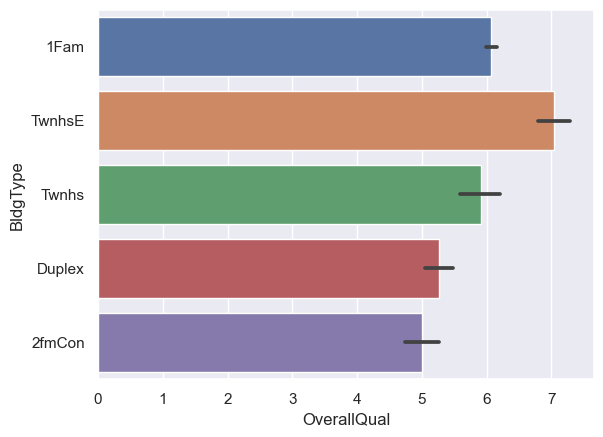

<Figure size 8000x800 with 0 Axes>

In [67]:
sns.barplot(x=Housing['OverallQual'], y=Housing['BldgType'])
plt.figure(figsize=(80, 8))

In [69]:
print(Housing.dtypes)

Id                 int64
LotArea            int64
Street            object
Utilities         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64


In [78]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('tes_data_project1.csv')  # Replace with your dataset filename

# Display the first few rows of the dataset
data.head()

,Id,LotArea,Street,Utilities,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,YrSold,SaleType,SaleCondition
0,1461,11622,Pave,AllPub,NAmes,Feedr,Norm,1Fam,5,6,...,0.0,1,0,2,1,5,Typ,2010,WD,Normal
1,1462,14267,Pave,AllPub,NAmes,Norm,Norm,1Fam,6,6,...,0.0,1,1,3,1,6,Typ,2010,WD,Normal
2,1463,13830,Pave,AllPub,Gilbert,Norm,Norm,1Fam,5,5,...,0.0,2,1,3,1,6,Typ,2010,WD,Normal
3,1464,9978,Pave,AllPub,Gilbert,Norm,Norm,1Fam,6,6,...,0.0,2,1,3,1,7,Typ,2010,WD,Normal
4,1465,5005,Pave,AllPub,StoneBr,Norm,Norm,TwnhsE,8,5,...,0.0,2,0,2,1,5,Typ,2010,WD,Normal


In [80]:
# Handle missing values
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   Street         1459 non-null   float64
 3   Utilities      1459 non-null   float64
 4   Neighborhood   1459 non-null   float64
 5   Condition1     1459 non-null   float64
 6   Condition2     1459 non-null   float64
 7   BldgType       1459 non-null   float64
 8   OverallQual    1459 non-null   float64
 9   OverallCond    1459 non-null   float64
 10  YearBuilt      1459 non-null   float64
 11  YearRemodAdd   1459 non-null   float64
 12  RoofStyle      1459 non-null   float64
 13  RoofMatl       1459 non-null   float64
 14  Exterior1st    1459 non-null   float64
 15  Exterior2nd    1459 non-null   float64
 16  ExterQual      1459 non-null   float64
 17  ExterCond      1459 non-null   float64
 18  Foundati

In [86]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

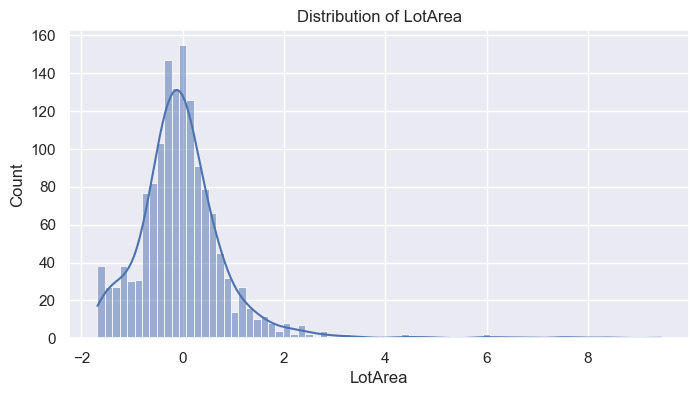

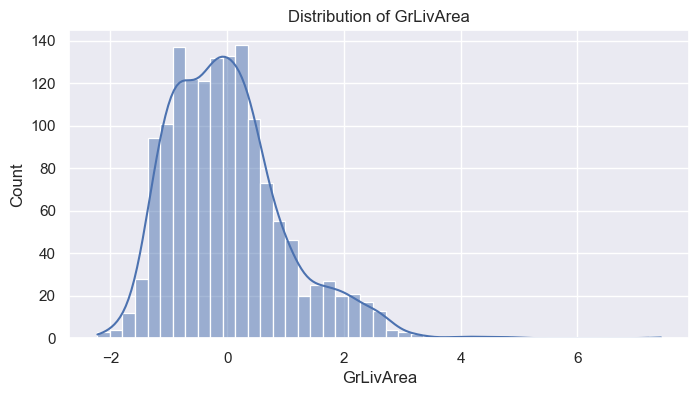

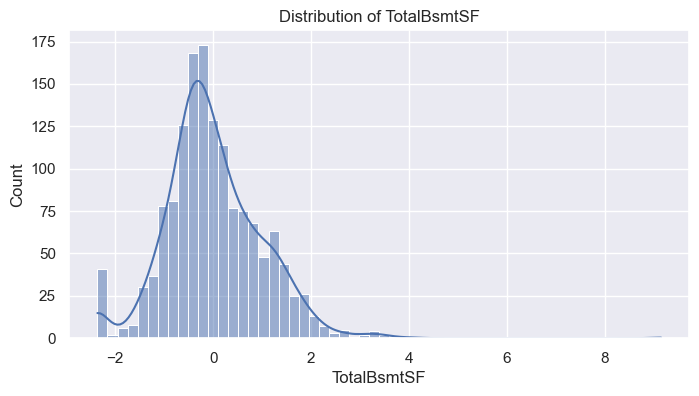

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
for col in ['LotArea', 'GrLivArea', 'TotalBsmtSF']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

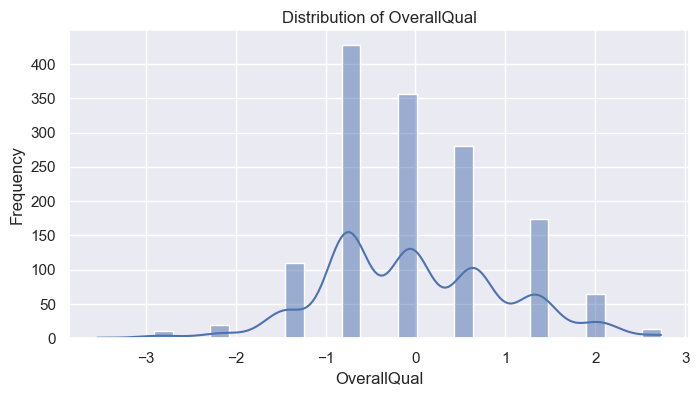

In [108]:
column_name = 'OverallQual'

plt.figure(figsize=(8, 4))  # Correcting the typo in plt.figure
sns.histplot(data[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

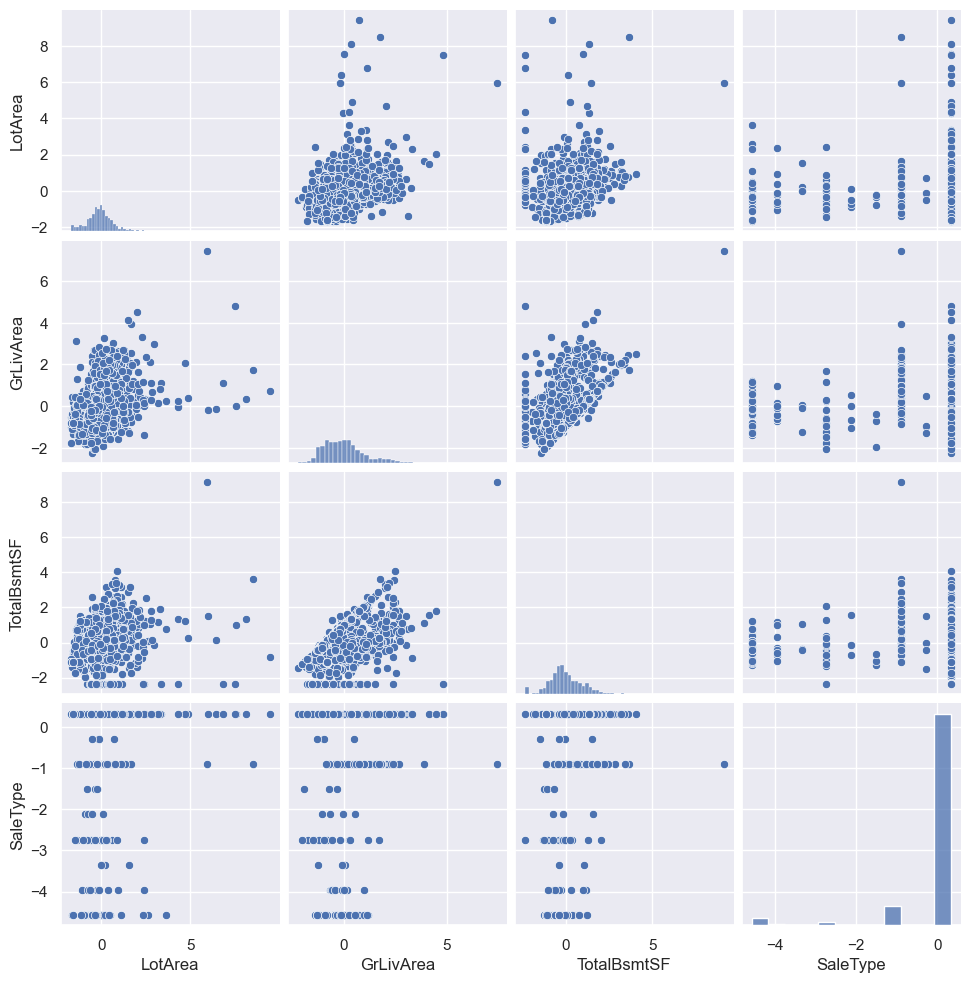

In [104]:

sns.pairplot(data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'SaleType']]) 
plt.show()

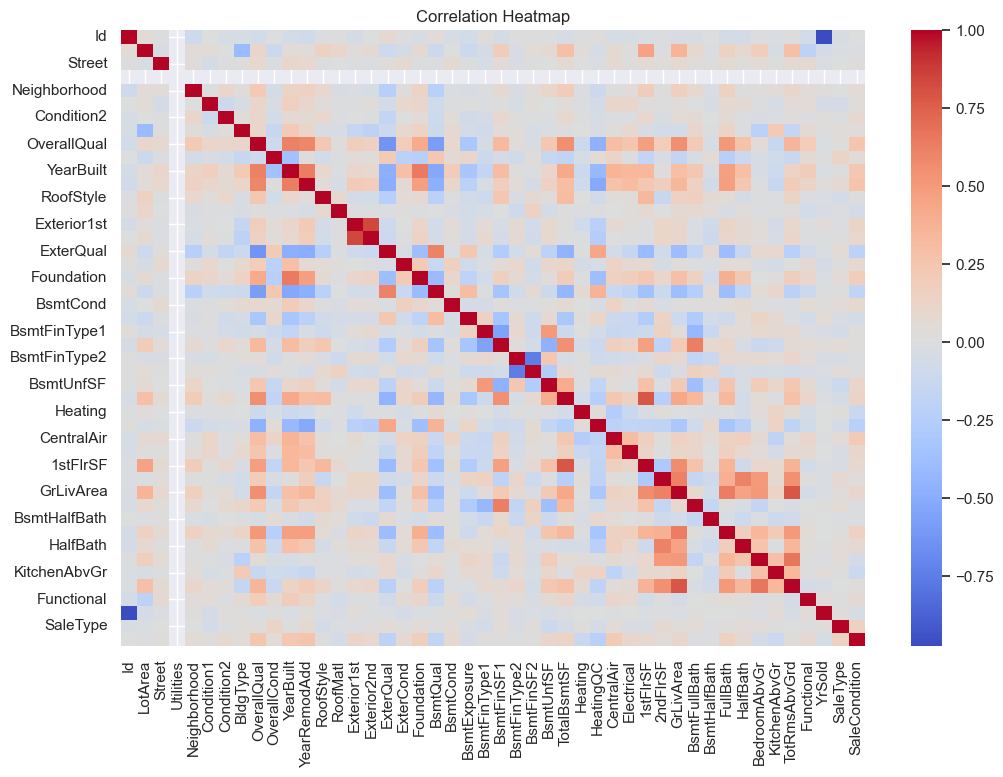

In [90]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [92]:
# Descriptive statistics
data.describe()

,Id,LotArea,Street,Utilities,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,YrSold,SaleType,SaleCondition
count,1459.000000,1.459000e+03,1.459000e+03,1459.0,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,...,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03
mean,0.000000,1.217517e-16,-2.368070e-16,0.0,-1.363619e-16,2.483734e-16,-1.314918e-16,-5.113570e-17,-2.678537e-16,-3.530798e-17,...,1.339268e-17,9.740133e-18,-1.461020e-17,1.558421e-16,5.210971e-16,2.447209e-16,-1.899326e-16,-7.854444e-14,-1.801925e-16,-1.266217e-16
std,1.000343,1.000343e+00,1.000343e+00,0.0,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730864,-1.685399e+00,-1.556171e+01,0.0,-2.140996e+00,-2.330252e+00,-1.392457e+01,-4.266246e-01,-3.535998e+00,-4.090153e+00,...,-2.581598e-01,-2.830523e+00,-7.510395e-01,-3.440622e+00,-5.002369e+00,-2.244263e+00,-6.493687e+00,-1.359958e+00,-4.572514e+00,-3.589818e+00
25%,-0.865432,-4.901594e-01,6.426031e-02,0.0,-7.841136e-01,-5.611310e-02,2.869073e-02,-4.266246e-01,-7.511012e-01,-4.974178e-01,...,-2.581598e-01,-1.028720e+00,-7.510395e-01,-1.029543e+00,-2.039099e-01,-9.183347e-01,2.583900e-01,-5.914922e-01,3.247500e-01,2.013832e-01
50%,0.000000,-8.481559e-02,6.426031e-02,0.0,-1.056722e-01,-5.611310e-02,2.869073e-02,-4.266246e-01,-5.487716e-02,-4.974178e-01,...,-2.581598e-01,7.730835e-01,-7.510395e-01,1.759972e-01,-2.039099e-01,-2.553707e-01,2.583900e-01,1.769736e-01,3.247500e-01,2.013832e-01
75%,0.865432,3.428343e-01,6.426031e-02,0.0,7.423794e-01,-5.611310e-02,2.869073e-02,-4.266246e-01,6.413469e-01,4.007660e-01,...,-2.581598e-01,7.730835e-01,1.237648e+00,1.759972e-01,-2.039099e-01,4.075934e-01,2.583900e-01,9.454395e-01,3.247500e-01,2.013832e-01
max,1.730864,9.443389e+00,6.426031e-02,0.0,1.929652e+00,6.766305e+00,1.398195e+01,2.866737e+00,2.730019e+00,3.095317e+00,...,7.671422e+00,4.376690e+00,3.226335e+00,3.792617e+00,4.594550e+00,5.711306e+00,2.583900e-01,1.713905e+00,3.247500e-01,1.149184e+00


In [94]:
# Find highly correlated features
corr_matrix = data.corr()
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[(high_corr[0] > 0.7) & (high_corr['level_0'] != high_corr['level_1'])]
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr

,Feature 1,Feature 2,Correlation
42,Id,YrSold,0.974884
599,Exterior1st,Exterior2nd,0.842841
643,Exterior2nd,Exterior1st,0.842841
1059,BsmtFinType2,BsmtFinSF2,0.745720
1103,BsmtFinSF2,BsmtFinType2,0.745720
1201,TotalBsmtSF,1stFlrSF,0.784477
1421,1stFlrSF,TotalBsmtSF,0.784477
1525,GrLivArea,TotRmsAbvGrd,0.788012
1833,TotRmsAbvGrd,GrLivArea,0.788012
1890,YrSold,Id,0.974884


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# features (X) and target variable (y)

X = data.drop('SaleCondition', axis=1)  
y = data['SaleCondition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.9816942276160227
